# Exploratory Data Analysis on Breast Cancer Diagnosis Dataset
This notebook presents code used to conduct exploratory data analysis on the Breast Cancer Diagnosis dataset. Exploratory data analysis will help us understand the features and attributes of the dataset better and also help communicate useful insights about the data. Outliers and missing values in the dataset will be will be imputed using approriate methods. The notebook will also visualize the dataset using different plots in order to understand the features in the dataset better. 
After having a clear understanding of the data, we will extract useful features from the dataset and perform feature scaling in order to have the best features for our dataset. The <i>Breast Cancer Diagnosis Dataset<i> can be downloaded <a href="https://www.kaggle.com/uciml/breast-cancer-wisconsin-data"><strong>on Kaggle</a>

## Import Required Packages and Modules

In [40]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys
from sklearn.preprocessing import LabelEncoder

## Load the data into a Pandas DataFrame
We will use a Loader defined in load.py script to load the data into a pandas Dataframe

In [2]:
# add scripts
import sys
import os
sys.path.append(os.path.abspath("../scripts/"))
from load_data import LoadData
loader = LoadData()

In [3]:
diagnosis_df = loader.read_csv("../data/data.csv")
diagnosis_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Breast Cancer Dataset Exploration

In [4]:
diagnosis_df.shape

(569, 33)

In [5]:
print(f"The dataframe has {len(diagnosis_df.columns.to_list())} columns")
print("The columns in the dataframe are: ")
print(diagnosis_df.columns.to_list())

The dataframe has 33 columns
The columns in the dataframe are: 
['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']


In [6]:
print(diagnosis_df.dtypes.to_list())

[dtype('int64'), dtype('O'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64')]


In [7]:
diagnosis_df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

### Observations from the data features:
<ul>
    <li>The dataset is made up of 569 row and 33 columns</li>
    <li>Apart from the diagnosis column which is made up of strings, all the other columns are of type float</li>
    <li>The last column in the dataset ("Unnamed: 32") is does not contain any values. All the other columns do not have any missing values</li>
    
</ul>
  Since the last column in the dataset do not contain any data, we drop it.  
    

In [8]:
diagnosis_df.drop(columns='Unnamed: 32', inplace=True)
diagnosis_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## <b>Univariate analysis</b>

In [9]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from utils import Utils
util = Utils("../logs/notebook.logs")

C:\Users\wakur\anaconda3\envs\causal-inference\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### 1. Distribution of Diagnosis

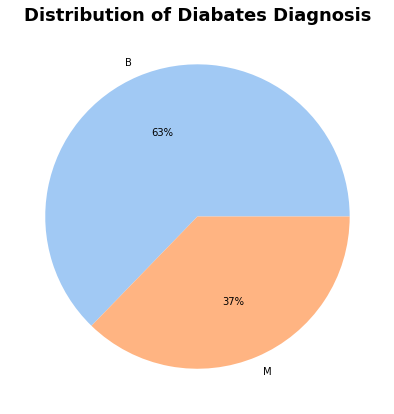

In [10]:
util.plot_pie(diagnosis_df, 'diagnosis', 'Distribution of Diabates Diagnosis')

### 2. Distribution of radius-mean

<Figure size 648x504 with 0 Axes>

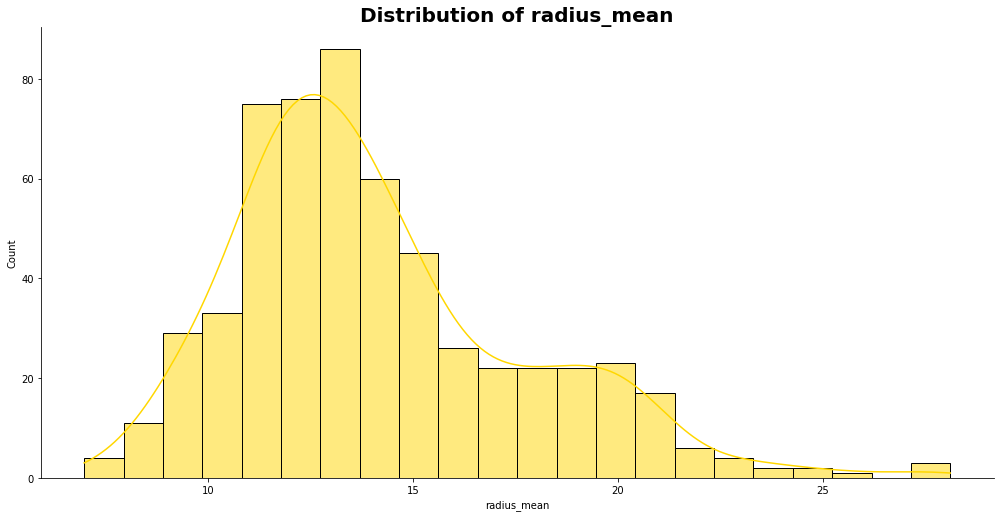

In [11]:
util.plot_hist(diagnosis_df, 'radius_mean', 'gold')

### 3. Distribution of texture_mean

<Figure size 648x504 with 0 Axes>

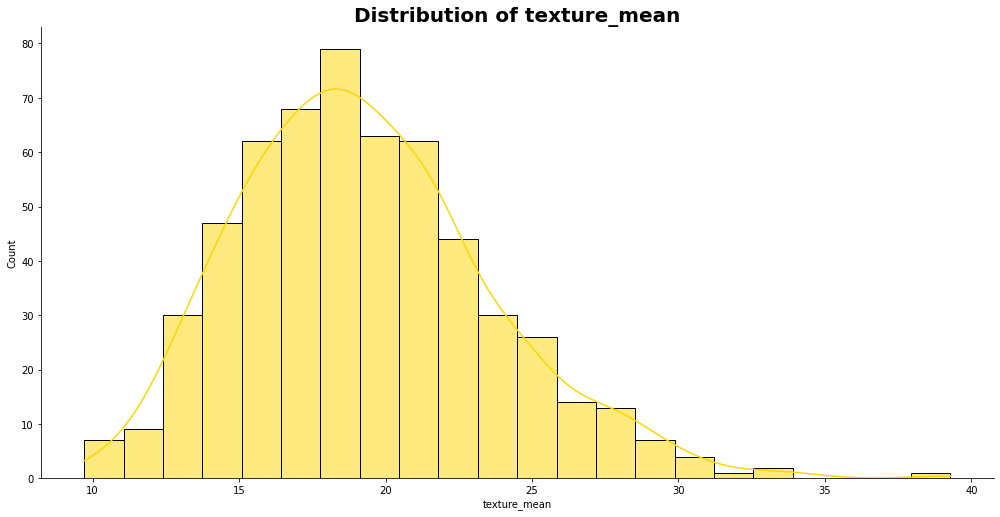

In [13]:
util.plot_hist(diagnosis_df, 'texture_mean', 'gold')

### 4. Distribution of perimeter_mean

<Figure size 648x504 with 0 Axes>

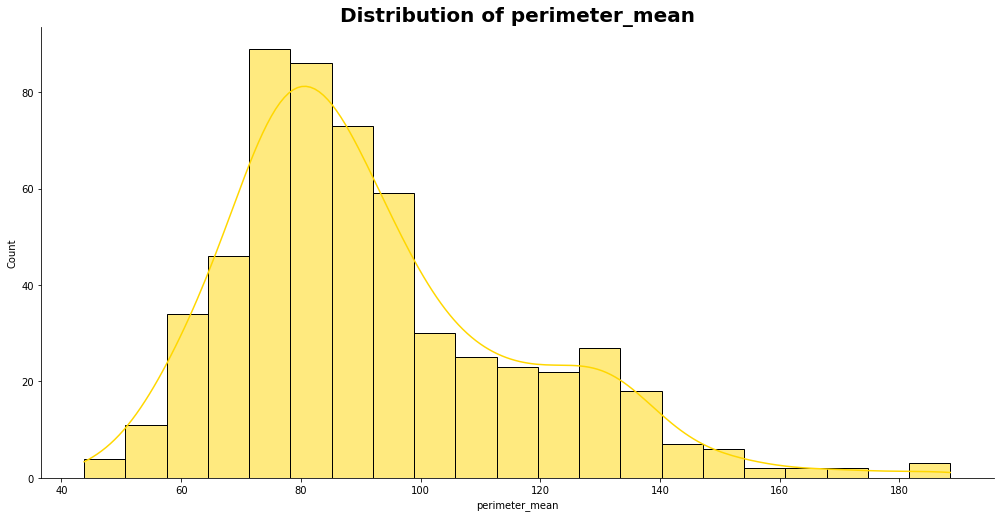

In [14]:
util.plot_hist(diagnosis_df, 'perimeter_mean', 'gold')

### 5. Distribution of area_mean

<Figure size 648x504 with 0 Axes>

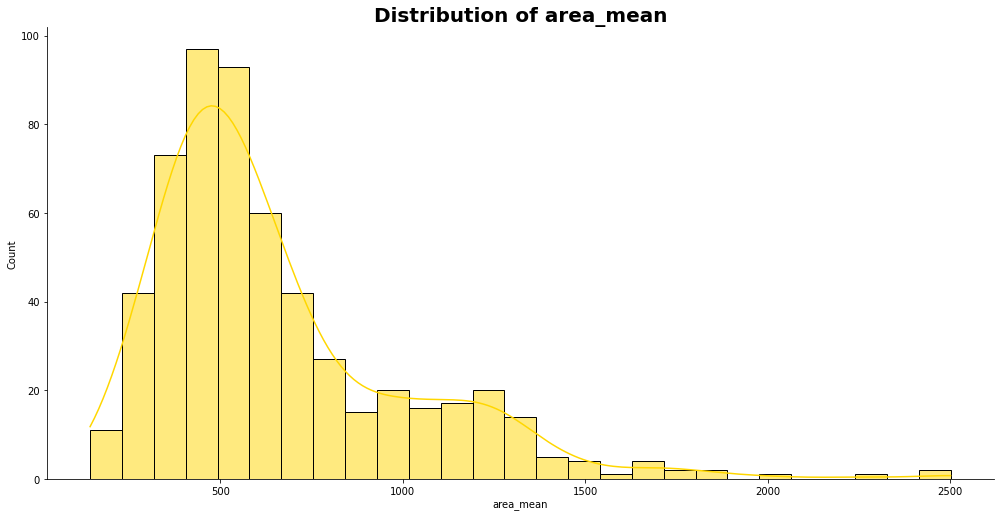

In [15]:
util.plot_hist(diagnosis_df, 'area_mean', 'gold')

### 6. Distribution of smoothness_mean

<Figure size 648x504 with 0 Axes>

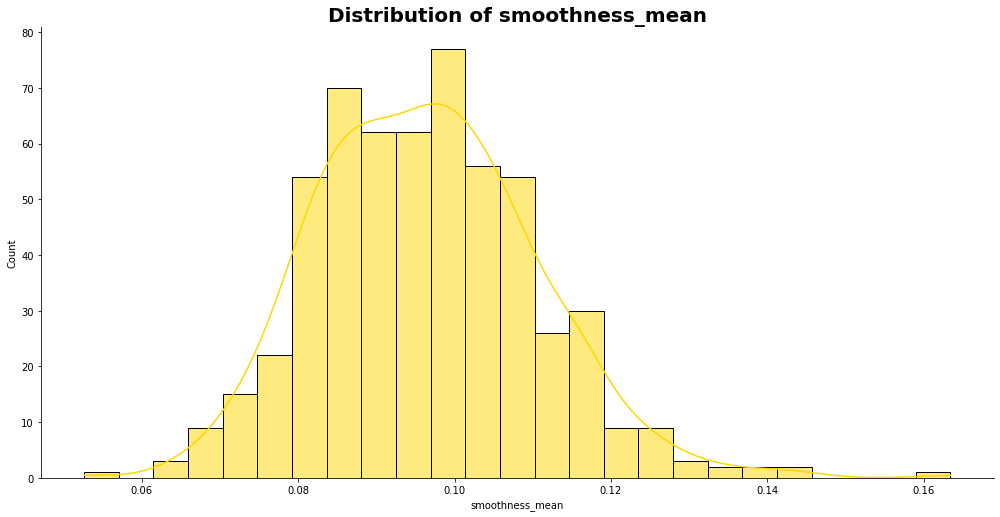

In [16]:
util.plot_hist(diagnosis_df, 'smoothness_mean', 'gold')

### 7. Distribution of compactness_mean

<Figure size 648x504 with 0 Axes>

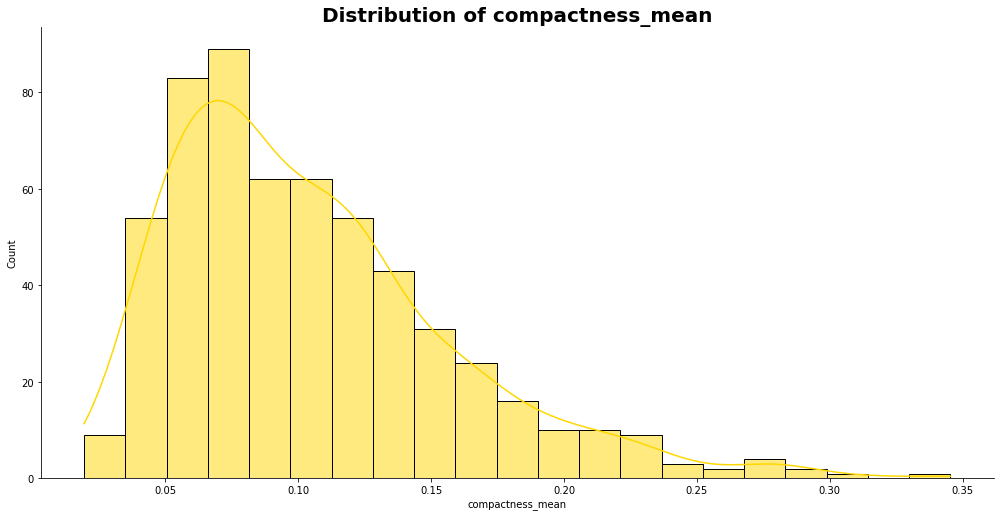

In [17]:
util.plot_hist(diagnosis_df, 'compactness_mean', 'gold')

### 8. Distribution of concavity_mean

<Figure size 648x504 with 0 Axes>

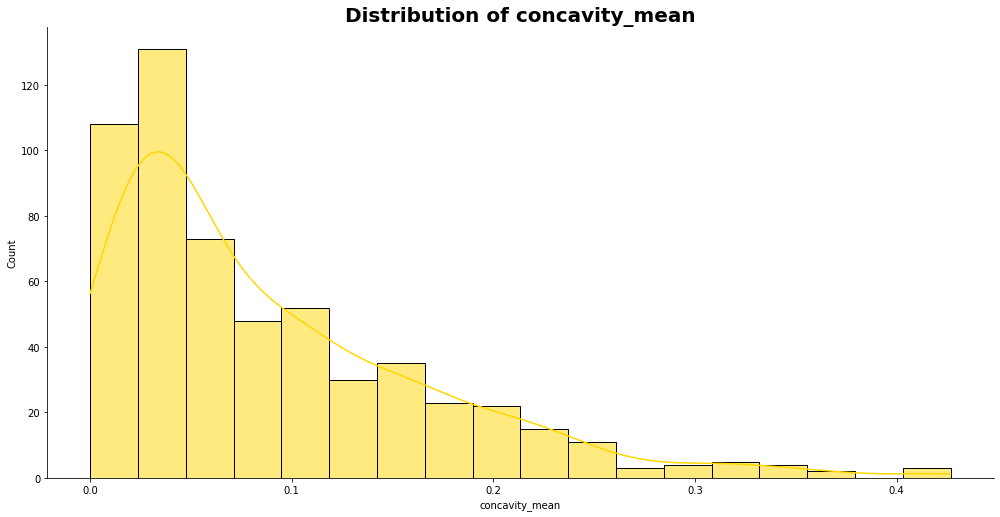

In [18]:
util.plot_hist(diagnosis_df, 'concavity_mean', 'gold')

### 9. Distribution of concave points_mean

<Figure size 648x504 with 0 Axes>

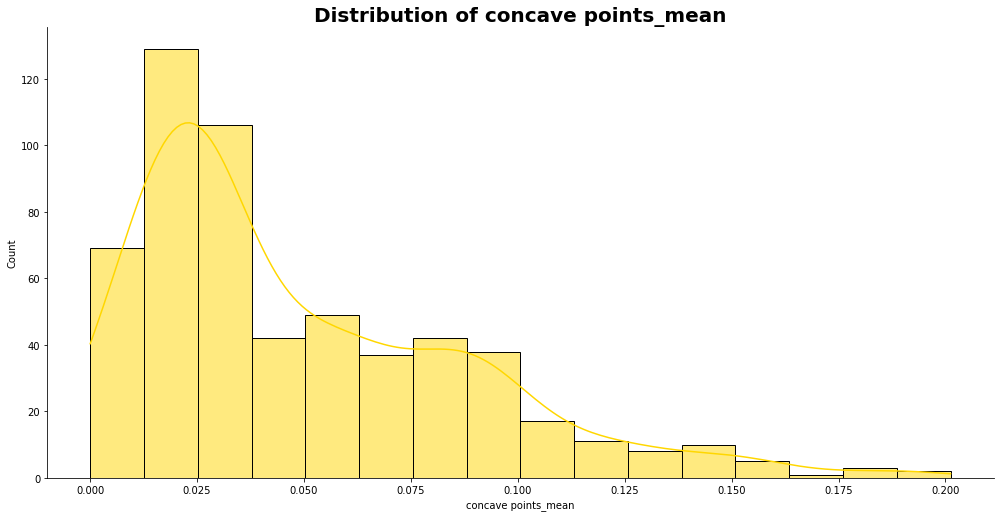

In [19]:
util.plot_hist(diagnosis_df, 'concave points_mean', 'gold')

### 10. Distribution of symmetry_mean

<Figure size 648x504 with 0 Axes>

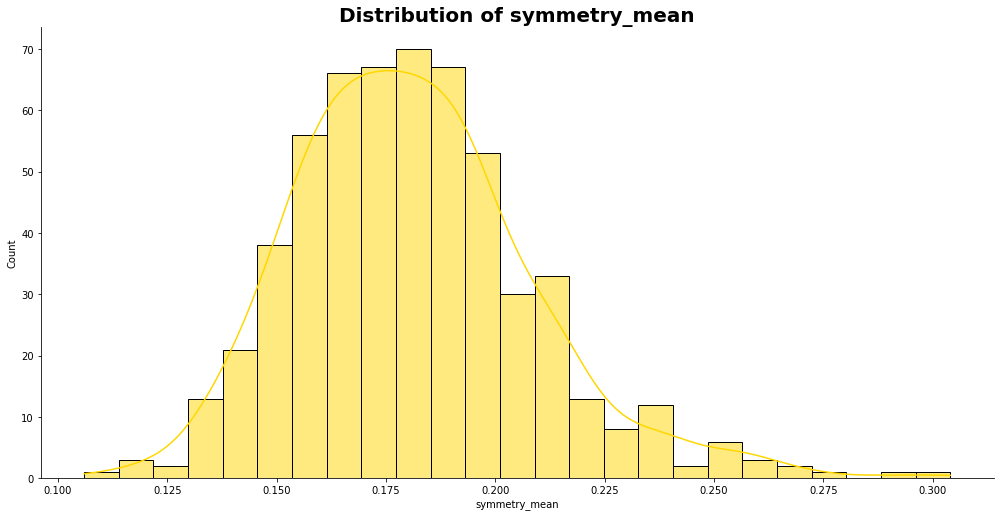

In [20]:
util.plot_hist(diagnosis_df, 'symmetry_mean', 'gold')

### 11. Distribution of fractal_dimension_mean

<Figure size 648x504 with 0 Axes>

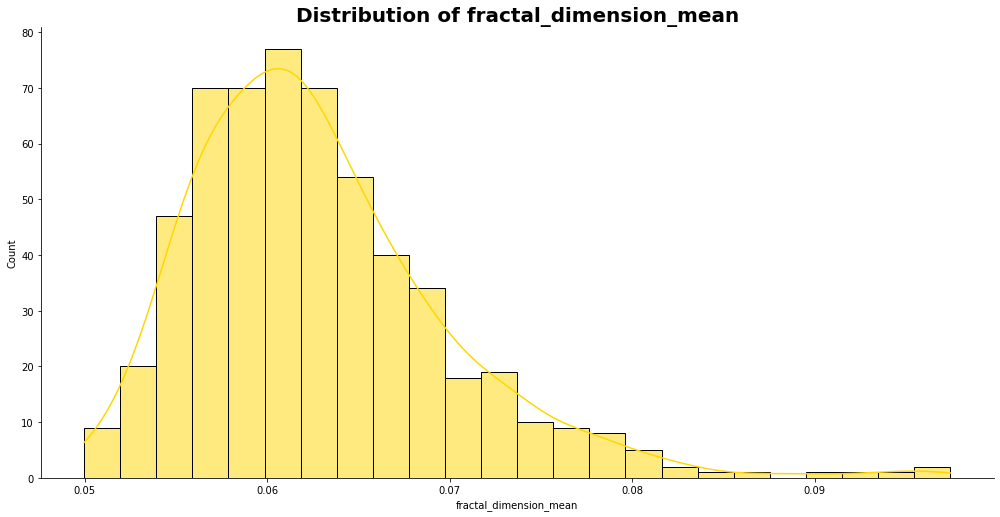

In [21]:
util.plot_hist(diagnosis_df, 'fractal_dimension_mean', 'gold')

<Figure size 1152x1224 with 0 Axes>

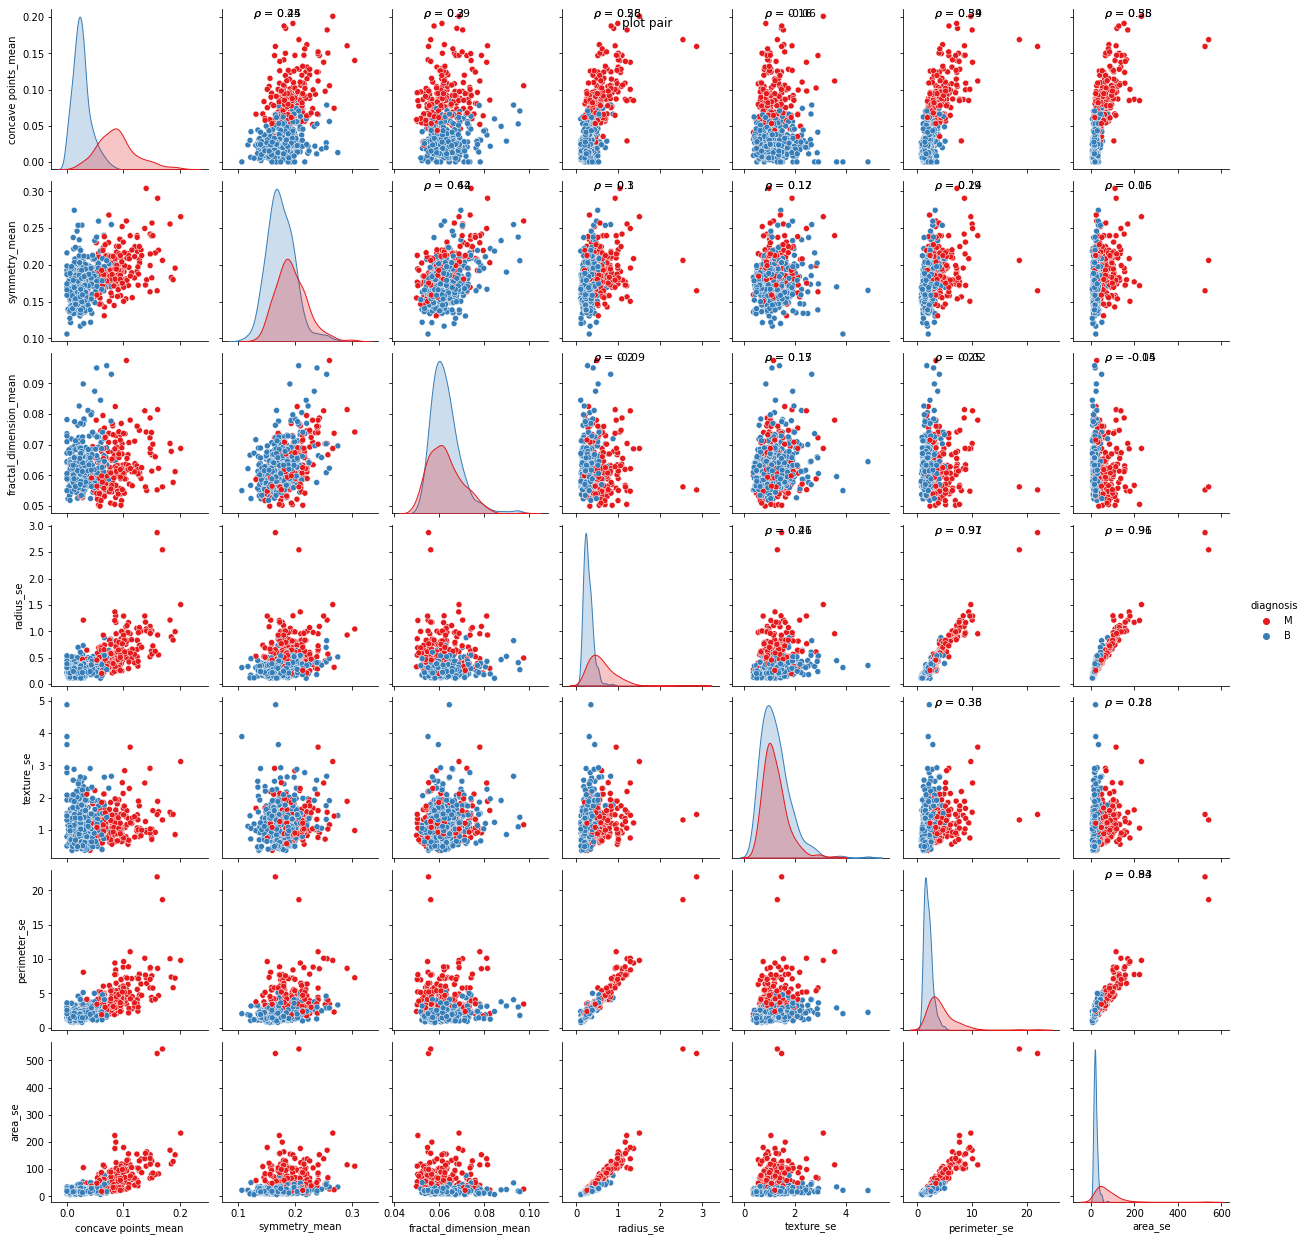

INFO:utils:pair-plot successfully generated


In [22]:
util.plot_pair(diagnosis_df, "plot pair", [8,15], [16,17])

### <b>Correlation analysis</b>

INFO:utils:correlatin heatmap successfully generated


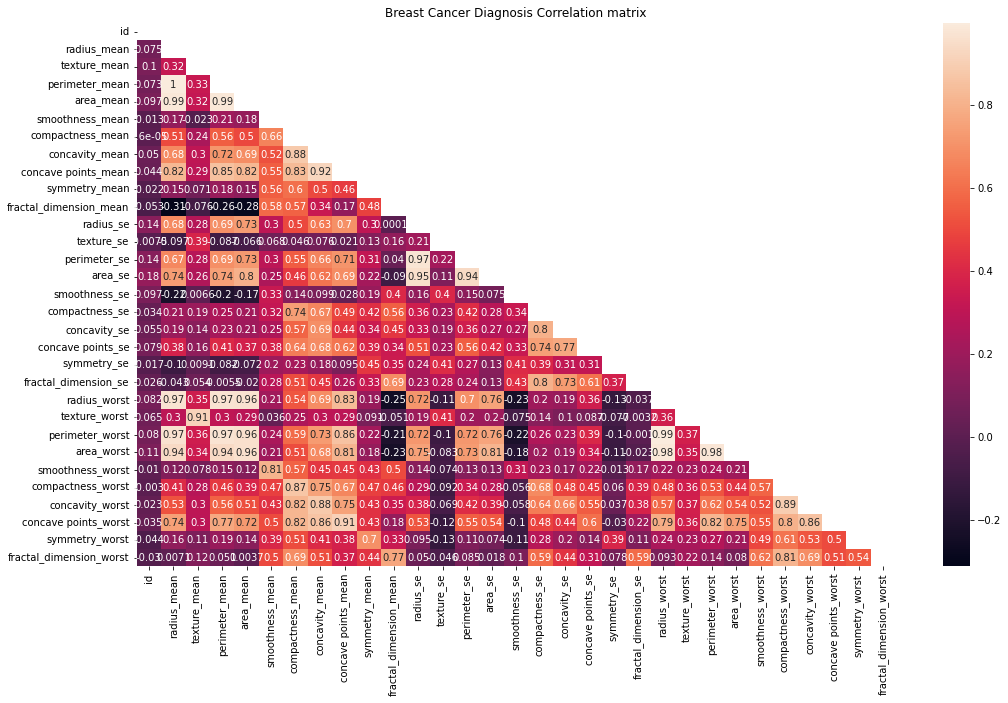

In [23]:
util.show_corr(diagnosis_df, "Breast Cancer Diagnosis Correlation matrix")

The dataset is skewed to the right.
There is a high correlation between radius_mean and area_worse, perimeter_worst, and perimeter_mean
There is also a high correlation between area_se and perimeter_se

### <b>Feature Extraction and Scaling</b>

In [32]:
features_df = diagnosis_df.drop(columns=['diagnosis', 'id'], axis=1)
features_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [33]:
target_df = diagnosis_df['diagnosis']
target_df.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

### Removing highly correlated features
Remove fheadres with a correlation higher  0.9

In [34]:
new_df = util.remove_correlated(features_df, 0.9)
new_df.head()

INFO:utils:correlated variables successfully removed


number of correlated variables: 10
..................................................
correlated features:  {'concave points_mean', 'radius_worst', 'concave points_worst', 'perimeter_mean', 'perimeter_se', 'area_se', 'area_mean', 'area_worst', 'perimeter_worst', 'texture_worst'}


,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678


### <b>Selecting the first 10 columns</b>

In [35]:
selected_feat = util.select_features_RFE(new_df, target_df, 10)
selected_feat.head()

INFO:utils:successfully selected features


,radius_mean,texture_mean,smoothness_mean,concavity_mean,radius_se,compactness_se,concavity_se,smoothness_worst,compactness_worst,concavity_worst
0,17.99,10.38,0.11840,0.3001,1.0950,0.04904,0.05373,0.1622,0.6656,0.7119
1,20.57,17.77,0.08474,0.0869,0.5435,0.01308,0.01860,0.1238,0.1866,0.2416
2,19.69,21.25,0.10960,0.1974,0.7456,0.04006,0.03832,0.1444,0.4245,0.4504
3,11.42,20.38,0.14250,0.2414,0.4956,0.07458,0.05661,0.2098,0.8663,0.6869
4,20.29,14.34,0.10030,0.1980,0.7572,0.02461,0.05688,0.1374,0.2050,0.4000


### <b>Scaling and Normalizing the dataset</b>

In [36]:
# scaling and normalizing
scaled = util.scale_and_normalize(selected_feat)
scaled.head()

INFO:utils:variables scaled successfully
INFO:utils:variables normalized succesfully
INFO:utils:variables successfully scaled and normalized


,radius_mean,texture_mean,smoothness_mean,concavity_mean,radius_se,compactness_se,concavity_se,smoothness_worst,compactness_worst,concavity_worst
0,0.332480,0.014458,0.378881,0.448682,0.227262,0.224231,0.086580,0.383592,0.395177,0.362837
1,0.706526,0.299435,0.318447,0.223674,0.171853,0.089337,0.051599,0.381804,0.169795,0.211988
2,0.468684,0.304090,0.400749,0.360388,0.178921,0.221257,0.075401,0.376812,0.300284,0.280312
3,0.115843,0.198965,0.447359,0.311872,0.076694,0.299526,0.078825,0.504788,0.448843,0.302519
4,0.563779,0.140143,0.385181,0.415224,0.209280,0.150294,0.128560,0.391458,0.154318,0.285955


### Save the clean dataset

In [41]:
clean_df = scaled.copy()
clean_df['target']= LabelEncoder().fit_transform(target_df)
clean_df.head()

,radius_mean,texture_mean,smoothness_mean,concavity_mean,radius_se,compactness_se,concavity_se,smoothness_worst,compactness_worst,concavity_worst,target
0,0.332480,0.014458,0.378881,0.448682,0.227262,0.224231,0.086580,0.383592,0.395177,0.362837,1
1,0.706526,0.299435,0.318447,0.223674,0.171853,0.089337,0.051599,0.381804,0.169795,0.211988,1
2,0.468684,0.304090,0.400749,0.360388,0.178921,0.221257,0.075401,0.376812,0.300284,0.280312,1
3,0.115843,0.198965,0.447359,0.311872,0.076694,0.299526,0.078825,0.504788,0.448843,0.302519,1
4,0.563779,0.140143,0.385181,0.415224,0.209280,0.150294,0.128560,0.391458,0.154318,0.285955,1


In [42]:
#saving the dataset
clean_df.to_csv("../data/clean_data.csv")